<a href="https://colab.research.google.com/github/gizdatalab/pdf_parsing/blob/main/notebooks/pyMuPDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is to experiment with features of PyMuPDF tool, with focus on especially pdf containing tabular data.

https://pymupdf.readthedocs.io/en/latest/index.html

In [ ]:
!pip install --upgrade pymupdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 40.1 MB/s eta 0:00:00


In [ ]:
import glob
# path to data files
path_to_data = '/content/drive/MyDrive/Colab Notebooks/giz/audit/auditData/'
files = glob.glob(path_to_data+"*")
files

['/content/drive/MyDrive/Colab Notebooks/giz/audit/auditData/Annual Consolidated OAG audit reports 2020.pdf',
 '/content/drive/MyDrive/Colab Notebooks/giz/audit/auditData/Annual-Consolidated-OAG-audit-reports-2020.html',
 '/content/drive/MyDrive/Colab Notebooks/giz/audit/auditData/2020 audit report page13.jpg',
 '/content/drive/MyDrive/Colab Notebooks/giz/audit/auditData/Kalangala DLG Report of Auditor General 2022.pdf',
 '/content/drive/MyDrive/Colab Notebooks/giz/audit/auditData/MWTS Report of Auditor General 2022.pdf',
 '/content/drive/MyDrive/Colab Notebooks/giz/audit/auditData/Fortportal Regional Refferal Hospital Report of the Auditor General FY2018.pdf']

In [ ]:
import fitz

doc = fitz.open(files[4]) # open a document

# reading document metadata
print("Total page numbers", doc.page_count, '\n')
print(doc.metadata)
print(doc.get_toc())

Total page numbers 20 

{'format': 'PDF 1.5', 'title': '', 'author': 'Dell', 'subject': '', 'keywords': '', 'creator': 'Microsoft® Word 2010', 'producer': 'Microsoft® Word 2010', 'creationDate': "D:20230220134630+03'00'", 'modDate': "D:20230220134630+03'00'", 'trapped': '', 'encryption': None}
[]


# Images

In [ ]:
# https://pymupdf.readthedocs.io/en/latest/the-basics.html#extract-images-from-a-pdf


for page_index in range(len(doc)): # iterate over pdf pages
	page = doc[page_index] # get the page
	image_list = page.get_images()

	# print the number of images found on the page
	if image_list:
		print(f"Found {len(image_list)} images on page {page_index}")
	else:
		print("No images found on page", page_index)

	for image_index, img in enumerate(image_list, start=1): # enumerate the image list
		xref = img[0] # get the XREF of the image
		pix = fitz.Pixmap(doc, xref) # create a Pixmap

		if pix.n - pix.alpha > 3: # CMYK: convert to RGB first
			pix = fitz.Pixmap(fitz.csRGB, pix)

		pix.save("page_%s-image_%s.png" % (page_index, image_index)) # save the image as png
		pix = None

Found 1 images on page 0
No images found on page 1
No images found on page 2
No images found on page 3
No images found on page 4
No images found on page 5
No images found on page 6
No images found on page 7
No images found on page 8
No images found on page 9
No images found on page 10
No images found on page 11
No images found on page 12
No images found on page 13
No images found on page 14
Found 1 images on page 15
No images found on page 16
No images found on page 17
No images found on page 18
No images found on page 19


# Tables

https://github.com/pymupdf/PyMuPDF-Utilities/blob/master/table-analysis/compare-xps-pdf.ipynb

In [ ]:
"""
Utility function for showing images.

Intended to be imported in Jupyter notebooks to display pixmap images.

Invocation: "show_image(item, title)", where item is a PyMuPDF object
which has a "get_pixmap" method, and title is an optional string.

The function executes "item.get_pixmap(dpi=150)" and show the resulting
image.


Dependencies
------------
numpy, matplotlib, pymupdf
"""


def show_image(item, title=""):
    """Display a pixmap.

    Just to display Pixmap image of "item" - ignore the man behind the curtain.

    Args:
        item: any PyMuPDF object having a "get_pixmap" method.
        title: a string to be used as image title

    Generates an RGB Pixmap from item using a constant DPI and using matplotlib
    to show it inline of the notebook.
    """
    DPI = 150  # use this resolution
    import numpy as np
    import matplotlib.pyplot as plt

    # %matplotlib inline
    pix = item.get_pixmap(dpi=DPI)
    img = np.ndarray([pix.h, pix.w, 3], dtype=np.uint8, buffer=pix.samples_mv)
    plt.figure(dpi=DPI)  # set the figure's DPI
    plt.title(title)  # set title of image
    _ = plt.imshow(img, extent=(0, pix.w * 72 / DPI, pix.h * 72 / DPI, 0))
    plt.show()

Page Number 4
Number of tables found 1


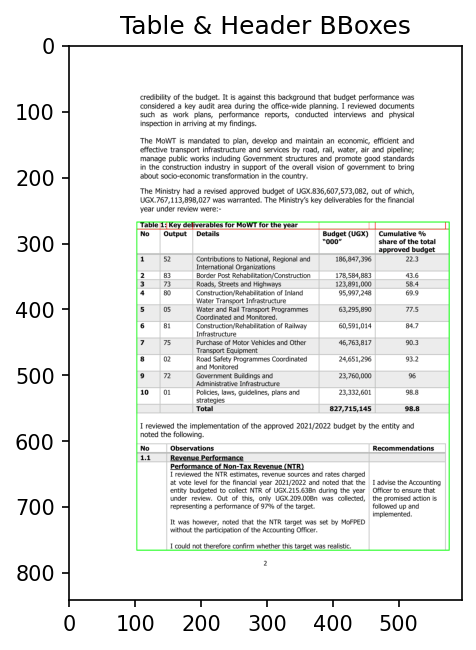



Page Number 5
Number of tables found 13


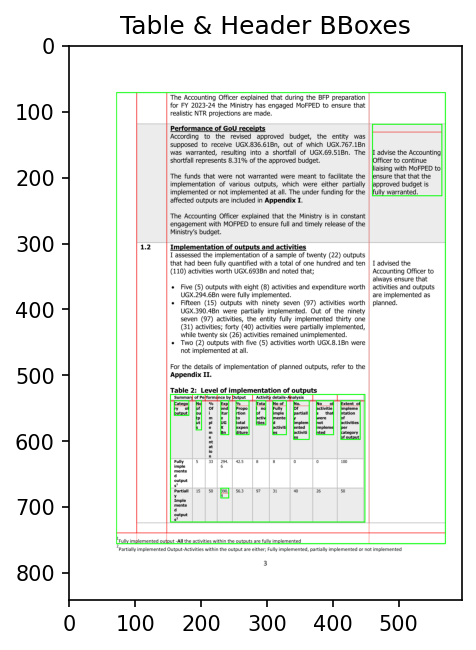

In [ ]:
# we check two pages
for page in doc.pages(4,6,1):
  print("Page Number", page.number)
  tabs = page.find_tables()  # detect the tables
  print("Number of tables found",len(tabs.tables))
  for i,tab in enumerate(tabs):  # iterate over all tables
      for cell in tab.header.cells:
          page.draw_rect(cell,color=fitz.pdfcolor["red"],width=0.3)
      page.draw_rect(tab.bbox,color=fitz.pdfcolor["green"])
      # print(f"Table {i} column names: {tab.header.names}, external: {tab.header.external}")
      # df = tab.to_pandas()
      # display(df)
  show_image(page, f"Table & Header BBoxes")
  print('\n')

In [ ]:
page = doc[5]
tabs = page.find_tables()
for tab in tabs:
    print(tab.extract())

[['', '', 'The Accounting Officer explained that during the BFP preparation\nfor FY 2023-24 the Ministry has engaged MoFPED to ensure that\nrealistic NTR projections are made.', None, None, ''], [None, '', '', 'Performance of GoU receipts', '', 'I advise the Accounting\nOfficer to continue\nliaising with MoFPED to\nensure that that the\napproved budget is\nfully warranted.'], [None, None, None, 'According to the revised approved budget, the entity was', None, None], [None, None, None, 'supposed to receive UGX.836.61Bn, out of which UGX.767.1Bn', None, None], [None, None, None, 'was warranted, resulting into a shortfall of UGX.69.51Bn. The', None, None], [None, None, None, 'shortfall represents 8.31% of the approved budget.', None, None], [None, None, None, '', None, None], [None, None, None, 'The funds that were not warranted were meant to facilitate the', None, None], [None, None, None, 'implementation of various outputs, which were either partially', None, None], [None, None, None, '

# Blocks
https://pymupdf.readthedocs.io/en/latest/app1.html#blocks

In [ ]:
page = doc[5]
# for page in doc.pages(4,6,1):
tabs = page.get_text("blocks", sort = False)
for block in tabs:
  print(block)

(294.8900146484375, 781.199951171875, 302.9058532714844, 792.239990234375, '3 \n', 0, 0)
(72.02400207519531, 794.6399536132812, 74.51985931396484, 805.6799926757812, ' \n', 1, 0)
(153.6199951171875, 72.97513580322266, 452.308837890625, 109.2371597290039, 'The Accounting Officer explained that during the BFP preparation \nfor FY 2023-24 the Ministry has engaged MoFPED to ensure that \nrealistic NTR projections are made. \n', 2, 0)
(108.0199966430664, 120.2551040649414, 452.5401306152344, 289.1471252441406, ' \nPerformance of GoU receipts \nAccording to the revised approved budget, the entity was \nsupposed to receive UGX.836.61Bn, out of which UGX.767.1Bn \nwas warranted, resulting into a shortfall of UGX.69.51Bn. The \nshortfall represents 8.31% of the approved budget.   \n \nThe funds that were not warranted were meant to facilitate the \nimplementation of various outputs, which were either partially \nimplemented or not implemented at all. The under funding for the \naffected outputs